# Importing libraries

In [1]:
import pandas as pd
import numpy as np
#from jupyter_datatables import init_datatables_mode
import string
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle
from pycm import *



#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

In [2]:
# init_datatables_mode()

# Reading Datasets

In [30]:
# Read JSON data into a pandas dataframe - yelp_academic_dataset_business.json
df_yelp_business = pd.read_json("C:\\Users\\rajbh\
\OneDrive\\Desktop\\Data 607 - Machine Learning Yelp\\yelp_academic_dataset_business.json", lines=True)
display(df_yelp_business.head(5))
display(df_yelp_business.shape)
#df_yelp_business = pd.read_json(json_data)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


(150346, 14)

In [31]:
# Read JSON data into a pandas dataframe - yelp_academic_dataset_checkin.json
df_yelp_checkin = pd.read_json("C:\\Users\\rajbh\\OneDrive\\Desktop\\Data 607 - Machine Learning Yelp\\yelp_academic_dataset_checkin.json", lines=True)
display(df_yelp_checkin.head(5))
display(df_yelp_checkin.shape)
#df_yelp_business = pd.read_json(json_data)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


(131930, 2)

In [32]:
# Read JSON data into a pandas dataframe - yelp_academic_dataset_review.json
file_path = "C:\\Users\\rajbh\\OneDrive\\Desktop\\Data 607 - Machine Learning Yelp\\yelp_academic_dataset_review.json"
column_names = ["review_id","user_id","business_id","stars","date","text","useful","funny","cool"]

df_yelp_review = pd.DataFrame(columns=column_names)

# reading data in chunks
chunksize = 100000
for chunk in pd.read_json(file_path, lines=True, chunksize=chunksize):
    df_yelp_review = pd.concat([df_yelp_review, chunk], ignore_index=True)

In [33]:
display(df_yelp_review.head())
df_yelp_review.shape

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11,"If you decide to eat here, just be aware it is...",0,0,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,2012-01-03 15:28:18,I've taken a lot of spin classes over the year...,1,0,1
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,2014-02-05 20:30:30,Family diner. Had the buffet. Eclectic assortm...,0,0,0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo...",1,0,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,2017-01-14 20:54:15,Cute interior and owner (?) gave us tour of up...,1,0,1


(6990280, 9)

In [34]:
# Read JSON data into a pandas dataframe - yelp_academic_dataset_tip.json
df_yelp_tip = pd.read_json("C:\\Users\\rajbh\\OneDrive\\Desktop\\Data 607 - Machine Learning Yelp\\yelp_academic_dataset_tip.json", lines=True)
display(df_yelp_tip.head(5))
display(df_yelp_tip.shape)
#df_yelp_business = pd.read_json(json_data)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


(908915, 5)

# Checking for NA values in each of the dataset

In [35]:
df_yelp_business.isna().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [36]:
df_yelp_checkin.isna().sum()

business_id    0
date           0
dtype: int64

In [37]:
df_yelp_review.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [38]:
df_yelp_tip.isna().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

# Filtering all the resturant business reviewd on yelp

In [39]:
#This filters out all the business with restaurants as categories
#We can make resturant recommendation system
df_yelp_business_restaurants = df_yelp_business[df_yelp_business["categories"].str.contains("Restaurants", na=False)]

In [40]:
df_yelp_business_restaurants = df_yelp_business_restaurants.drop(['attributes','categories','hours'],axis=1)

In [41]:
df_yelp_business_restaurants.shape

(52268, 11)

In [14]:
df_yelp_business_restaurants['state'].unique()

NameError: name 'df_yelp_business_restaurants' is not defined

# Filtering the dataframe to get yelp data for only Florida restaurants

In [16]:
df_Florida_restaurants = df_yelp_business_restaurants[df_yelp_business_restaurants["state"] == "FL"]

In [17]:
#List of Florida restaurants 
df_Florida_restaurants['city'].unique()

array(['Tampa Bay', 'Largo', 'Tampa', 'Wesley Chapel', 'Treasure Island',
       'Riverview', 'Saint Petersburg', 'Lutz', 'Clearwater',
       'New Port Richey', 'Brandon', 'Odessa', 'Oldsmar', 'Spring Hill',
       'St Petersburg', 'Hernando Beach', 'Plant City', 'Ruskin',
       'Madeira Beach', 'Holiday', 'Port Richey', 'Dunedin', 'Seminole',
       'Palm Harbor', 'Temple Terr', 'St. Petersburg', 'Pinellas Park',
       'Sun City Center', 'Gulfport', 'St Pete Beach', 'Apollo Beach',
       "Land O' Lakes", 'Clearwater Beach', 'St. Pete Beach', 'Hudson',
       'Tarpon Springs', 'Seffner', 'TAMPA', 'Valrico', 'Land o lakes',
       'Saint Pete Beach', 'Zephyrhills', 'Dover', 'Wimauma', 'Trinity',
       'Temple Terrace', 'Land O Lakes', 'NEW PORT RICHEY',
       'Safety Harbor', 'Thonotosassa', 'Hillsborough County',
       'North Redington Beach', 'South Pasadena', 'Indian Rocks Beach',
       'Sun City', 'Westchase', 'Carrollwood', 'Belleair Bluffs',
       'Twn N Cntry', 'Lithia',

In [18]:
df_Florida_restaurants_n_reviews = pd.merge(df_Florida_restaurants, df_yelp_review, on='business_id', how='left')

In [19]:
df_Florida_restaurants_n_reviews.isna().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars_x         0
review_count    0
is_open         0
review_id       0
user_id         0
stars_y         0
date            0
text            0
useful          0
funny           0
cool            0
dtype: int64

In [20]:
#DataFrame with Florida restaurants and all the reviews for each of the restaurants
display(df_Florida_restaurants_n_reviews.head(4))
display(df_Florida_restaurants_n_reviews.shape)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,review_id,user_id,stars_y,date,text,useful,funny,cool
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,1,oUv3avPmLiTwIgYlmQQXBQ,nnu9h6du4E6oqMasPgKR3Q,5,2019-04-04 16:03:00,I eat pho about 4 times a week and from a spec...,1,0,0
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,1,BQ4GJP2G8_NdQ9KHboueTg,JlEdjZvhAbFCU-ObZQb1lw,5,2018-10-23 00:36:29,I've been in Wesley Chapel area for about 2 ye...,2,0,1
2,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,1,Oe-THb7XKNZppI6AbrnXUQ,P1ccUaz-s3kumq3RHnOLvg,3,2019-10-18 18:01:29,Good tasted good - but I'm a bit confused as t...,1,1,0
3,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,1,BY7b9AXLyRGhLcvjrgHdjg,AaoRrywzPbEUI6R3ozS19g,4,2019-03-29 19:09:43,"Ordered the chicken wings. They were hot, fre...",2,0,1


(792133, 19)

In [21]:
df_Florida_restaurants_n_reviews["name"].unique().size

6412

In [22]:
df_Florida_reviews = pd.DataFrame()
df_Florida_reviews[["business_id","text"]] = df_Florida_restaurants_n_reviews.loc[:,["business_id","text"]]

In [23]:
df_Florida_restaurants_n_reviews.to_csv("Floridarestaurants.csv")

# Text Processing and feature generation

In [24]:
df_Florida_restaurants_n_reviews["review"] = df_Florida_restaurants_n_reviews["text"]

In [25]:
df_Florida_restaurants_n_reviews.sample(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,review_id,user_id,stars_y,date,text,useful,funny,cool,review
505375,KftsSJhTvpNAZlWRoLxr8Q,New York New York Pizza,11367 Big Bend Rd,Riverview,FL,33579,27.791354,-82.316713,3.5,150,1,o1YAO_rM7zxWDHGdwPWNwA,b8GBwLh-GB90U5htZZTA1A,5,2018-03-18 15:27:39,Best NY style pizza I have found in the area. ...,0,0,0,Best NY style pizza I have found in the area. ...
99008,ROnkVXPz5jRlMQvLw05UEA,Cappy's Pizza,16019 Tampa Palms Blvd,Tampa,FL,33647,28.099346,-82.398076,4.0,136,1,jR_b_vDe8iq-rVeLr5dVMg,us092vBFQxapkEzgsgscLQ,5,2020-10-03 02:19:47,The Chicago style pizza was out of this world ...,2,1,1,The Chicago style pizza was out of this world ...


## Text Preprocessing

In [26]:
#Converting the reviews to lowercase
%time df_Florida_restaurants_n_reviews["text"] = df_Florida_restaurants_n_reviews["text"].apply(lambda x:x.lower())

Wall time: 955 ms


In [27]:
#Removing the punctuation from the reviews
regex = '[' + string.punctuation + ']'
%time df_Florida_restaurants_n_reviews["text_nopunc"] = df_Florida_restaurants_n_reviews["text"].str.replace(regex,'')
%time df_Florida_restaurants_n_reviews["text_nopunc"]  = %time df_Florida_restaurants_n_reviews["text_nopunc"] .str.replace('[^\w\s]', '')

Wall time: 4.82 s
Wall time: 4.46 s
Wall time: 4.48 s


In [28]:
#Calculating Review Word Count
df_Florida_restaurants_n_reviews['Review_Word_Count'] = df_Florida_restaurants_n_reviews['text_nopunc'].apply(lambda x: len(str(x).split()))

In [29]:
df_Florida_restaurants_n_reviews['Review_Word_Count'].head(2)

0    78
1    85
Name: Review_Word_Count, dtype: int64

In [30]:
stop_words = set(stopwords.words('english'))

def removeStopwords(text):
    words = nltk.word_tokenize(text)
    cleanedText = [word for word in words if word.lower() not in stop_words]
    return ' '.join(cleanedText)

%time df_Florida_restaurants_n_reviews["text_nopunc"] = df_Florida_restaurants_n_reviews["text_nopunc"].apply(removeStopwords)

Wall time: 3min 23s


In [31]:
#df_Florida_restaurants_n_reviews.head(2)
#print(stopwords.words('english'))
#if "i've" in stopwords.words('english'):
    #print(True)
%time df_Florida_restaurants_n_reviews = df_Florida_restaurants_n_reviews[~df_Florida_restaurants_n_reviews["text_nopunc"].str.contains("'ve")]

Wall time: 1.38 s


In [32]:
# Tokenization
%time df_Florida_restaurants_n_reviews["text_nopunc"] = df_Florida_restaurants_n_reviews["text_nopunc"].apply(nltk.word_tokenize)

Wall time: 1min 58s


In [33]:
%%time
# Define a function to perform POS tagging on a single list of tokens
def pos_tag(tokens):
    tags = nltk.pos_tag(tokens)  # Perform POS tagging on the tokens
    return tags

# Apply the POS tagging function to the 'text_nopunc' column of your dataframe
df_Florida_restaurants_n_reviews['pos_tags'] = df_Florida_restaurants_n_reviews['text_nopunc'].apply(lambda x: pos_tag(x))

Wall time: 28min 5s


In [34]:
# Define a function to perform NER on a single list of POS tagged tokens
# def ner_tag(pos_tags):
#     ne_tagged = nltk.ne_chunk(pos_tags)  # Apply NER to the POS tagged text
#     return ne_tagged

# # Apply the NER function to the 'pos_tags' column of your dataframe
# df_Florida_restaurants_n_reviews['ner_tags'] = df_Florida_restaurants_n_reviews['pos_tags'].apply(lambda x: ner_tag(x))

In [35]:
# Define a function to perform stemming and lemmatization on a single list of tokens
def stem_and_lemmatize(tokens):
    porter_stemmer = PorterStemmer()
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmas = []
    for token, pos_tag in tokens:
        stem = porter_stemmer.stem(token)
        pos = pos_tag[0].lower() if pos_tag[0].lower() in ['a', 'r', 'n', 'v'] else 'n'
        lemma = wordnet_lemmatizer.lemmatize(token, pos=pos)
        lemmas.append(lemma)
    return lemmas


# Apply the stemming and lemmatization function to the 'text_nopunc' column of your dataframe
df_Florida_restaurants_n_reviews['lemmatized'] = df_Florida_restaurants_n_reviews['pos_tags'].apply(lambda x: stem_and_lemmatize(x))


In [36]:
df_Florida_restaurants_n_reviews["processed_text"] = df_Florida_restaurants_n_reviews["lemmatized"].apply(lambda x: " ".join(x))

In [37]:
df_Florida_restaurants_n_reviews.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,text,useful,funny,cool,review,text_nopunc,Review_Word_Count,pos_tags,lemmatized,processed_text
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,...,i eat pho about 4 times a week and from a spec...,1,0,0,I eat pho about 4 times a week and from a spec...,"[eat, pho, 4, times, week, specific, restauran...",78,"[(eat, NN), (pho, NN), (4, CD), (times, NNS), ...","[eat, pho, 4, time, week, specific, restaurant...",eat pho 4 time week specific restaurant vietna...
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,...,i've been in wesley chapel area for about 2 ye...,2,0,1,I've been in Wesley Chapel area for about 2 ye...,"[ive, wesley, chapel, area, 2, years, decent, ...",85,"[(ive, JJ), (wesley, NN), (chapel, NNS), (area...","[ive, wesley, chapel, area, 2, year, decent, b...",ive wesley chapel area 2 year decent bowl pho ...


In [38]:
df_Florida_restaurants_n_reviews['No_stopwords_review_word_count'] = df_Florida_restaurants_n_reviews['processed_text'].apply(lambda x: len(str(x).split()))

In [39]:
df_Florida_restaurants_n_reviews['Stopwords_word_count'] = df_Florida_restaurants_n_reviews['Review_Word_Count'] - df_Florida_restaurants_n_reviews['No_stopwords_review_word_count']

In [40]:
df_Florida_restaurants_n_reviews['Stopword_Percentage'] = df_Florida_restaurants_n_reviews['Stopwords_word_count']/df_Florida_restaurants_n_reviews['Review_Word_Count']

In [41]:
df_Florida_restaurants_n_reviews.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,cool,review,text_nopunc,Review_Word_Count,pos_tags,lemmatized,processed_text,No_stopwords_review_word_count,Stopwords_word_count,Stopword_Percentage
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,...,0,I eat pho about 4 times a week and from a spec...,"[eat, pho, 4, times, week, specific, restauran...",78,"[(eat, NN), (pho, NN), (4, CD), (times, NNS), ...","[eat, pho, 4, time, week, specific, restaurant...",eat pho 4 time week specific restaurant vietna...,32,46,0.589744
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,...,1,I've been in Wesley Chapel area for about 2 ye...,"[ive, wesley, chapel, area, 2, years, decent, ...",85,"[(ive, JJ), (wesley, NN), (chapel, NNS), (area...","[ive, wesley, chapel, area, 2, year, decent, b...",ive wesley chapel area 2 year decent bowl pho ...,34,51,0.600000


# Run all the cells above this 

In [42]:
# Calculate polarity
df_Florida_restaurants_n_reviews['polarity'] = df_Florida_restaurants_n_reviews['processed_text'].apply(lambda x: TextBlob(x).sentiment[0])

In [43]:
# Calculate subjectivity
%time df_Florida_restaurants_n_reviews['subjectivity'] = df_Florida_restaurants_n_reviews['processed_text'].apply(lambda x: TextBlob(x).sentiment[1])

Wall time: 3min 12s


In [44]:
df_Florida_restaurants_n_reviews.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,text_nopunc,Review_Word_Count,pos_tags,lemmatized,processed_text,No_stopwords_review_word_count,Stopwords_word_count,Stopword_Percentage,polarity,subjectivity
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,...,"[eat, pho, 4, times, week, specific, restauran...",78,"[(eat, NN), (pho, NN), (4, CD), (times, NNS), ...","[eat, pho, 4, time, week, specific, restaurant...",eat pho 4 time week specific restaurant vietna...,32,46,0.589744,0.340000,0.630000
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,...,"[ive, wesley, chapel, area, 2, years, decent, ...",85,"[(ive, JJ), (wesley, NN), (chapel, NNS), (area...","[ive, wesley, chapel, area, 2, year, decent, b...",ive wesley chapel area 2 year decent bowl pho ...,34,51,0.600000,0.043750,0.477083
2,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,...,"[good, tasted, good, bit, confused, vietnamese...",82,"[(good, JJ), (tasted, VBD), (good, JJ), (bit, ...","[good, taste, good, bit, confused, vietnamese,...",good taste good bit confused vietnamese good t...,36,46,0.560976,0.370000,0.650000
3,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,...,"[ordered, chicken, wings, hot, fresh, super, c...",29,"[(ordered, VBN), (chicken, JJ), (wings, NNS), ...","[order, chicken, wing, hot, fresh, super, cris...",order chicken wing hot fresh super crispy dren...,16,13,0.448276,0.297619,0.709524
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,...,"[order, pho, 1, hour, 15, minutes, food, peopl...",49,"[(order, NN), (pho, NN), (1, CD), (hour, NN), ...","[order, pho, 1, hour, 15, minute, food, people...",order pho 1 hour 15 minute food people fluster...,19,30,0.612245,-1.000000,1.000000


In [45]:
%%time
filtered_reviews = ' '.join([word for word in df_Florida_restaurants_n_reviews['processed_text']])
type(filtered_reviews)
# Generate a word cloud
#wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(filtered_reviews)

# Visualize the word cloud
#plt.figure(figsize=(8, 8), facecolor=None)
#plt.imshow(wordcloud)
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

Wall time: 239 ms


str

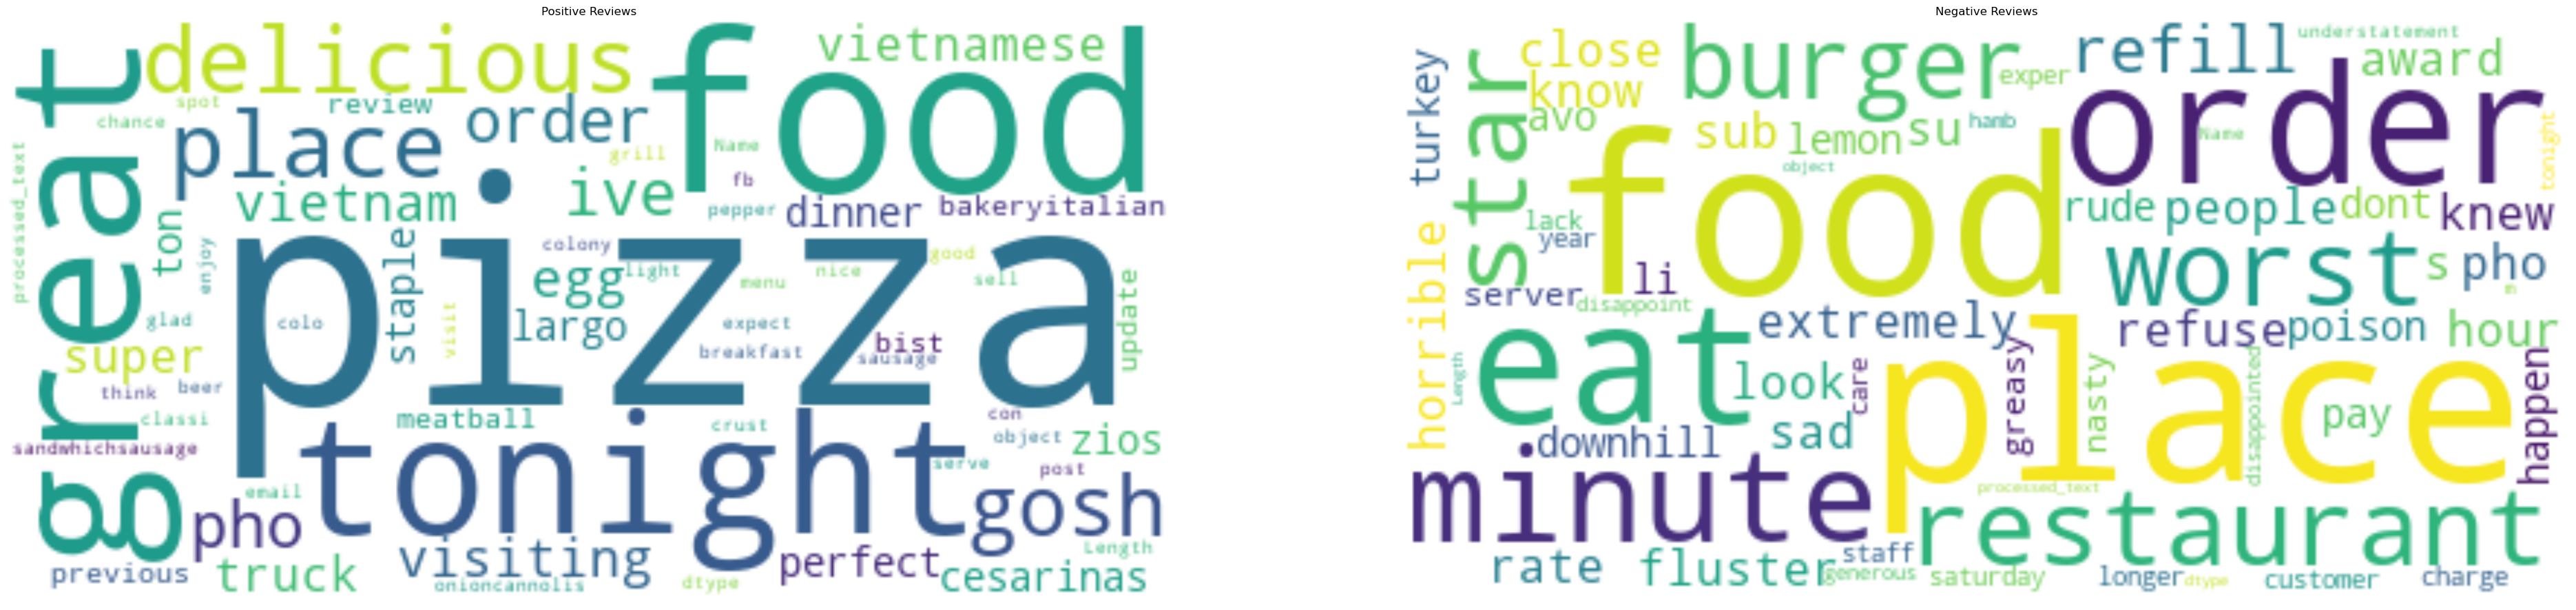

In [43]:


# Create a wordcloud for positive Yelp reviews
mask_positive = np.array(Image.open("thumb-up.png"))


positive_reviews = df_Florida_restaurants_n_reviews[df_Florida_restaurants_n_reviews['polarity'] > 0.4]
positive_text = str(positive_reviews["processed_text"])
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Create a wordcloud for negative Yelp reviews
#mask_negative = np.array(Image.open("thumb-down.png"))

negative_reviews = df_Florida_restaurants_n_reviews[df_Florida_restaurants_n_reviews['polarity'] < -0.4]
negative_text = str(negative_reviews['processed_text'])
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Display the wordclouds
plt.figure(figsize=(48,48))
plt.subplot(1,2,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1,2,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.show()

In [47]:
%%time

#Assigning sentiment to reviews



#Assigning sentiment to reviews
def sentimentAssign(polarity):
    if polarity >= 0.4:
        return 'Positive'
    if polarity > 0.2 and polarity < 0.4:
        return 'Slightly Positive'
    if polarity <= 0.2 and polarity > 0:
        return 'Slightly Negative'
    if polarity < 0:
        return 'Negative'
    if polarity == 0:
        return 'Neutral'

df_Florida_restaurants_n_reviews["sentiment"] = df_Florida_restaurants_n_reviews["polarity"].apply(sentimentAssign)

Wall time: 186 ms


In [48]:
df_Florida_restaurants_n_reviews.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,Review_Word_Count,pos_tags,lemmatized,processed_text,No_stopwords_review_word_count,Stopwords_word_count,Stopword_Percentage,polarity,subjectivity,sentiment
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,...,78,"[(eat, NN), (pho, NN), (4, CD), (times, NNS), ...","[eat, pho, 4, time, week, specific, restaurant...",eat pho 4 time week specific restaurant vietna...,32,46,0.589744,0.34000,0.630000,Slightly Positive
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,10,...,85,"[(ive, JJ), (wesley, NN), (chapel, NNS), (area...","[ive, wesley, chapel, area, 2, year, decent, b...",ive wesley chapel area 2 year decent bowl pho ...,34,51,0.600000,0.04375,0.477083,Slightly Negative


### Calculating positive word count and positive word count precentage

In [50]:
df_Florida_restaurants_n_reviews = df_Florida_restaurants_n_reviews.reset_index()
df_Florida_restaurants_n_reviews['lemmatized']

0         [eat, pho, 4, time, week, specific, restaurant...
1         [ive, wesley, chapel, area, 2, year, decent, b...
2         [good, taste, good, bit, confused, vietnamese,...
3         [order, chicken, wing, hot, fresh, super, cris...
4         [order, pho, 1, hour, 15, minute, food, people...
                                ...                        
792128    [small, menu, pizza, food, item, menu, option,...
792129    [place, great, space, big, nice, atmosphere, p...
792130    [menu, place, gosh, sell, pizza, food, gosh, g...
792131    [live, 10, year, style, pizza, thing, frankly,...
792132    [pizza, crust, light, great, spot, pizza, beer...
Name: lemmatized, Length: 792133, dtype: object

In [49]:
file = open("Positive_words.txt", "r")
snowBallStemmer = SnowballStemmer("english")

content = file.read()
pos_words = content.splitlines()
pos_words_stem = [snowBallStemmer.stem(word) for word in pos_words]

In [51]:
#Calculating Positive Word Count
good_count = []
for i in range(len(df_Florida_restaurants_n_reviews)):
    count = 0
    tokens = df_Florida_restaurants_n_reviews['lemmatized'][i]
    for word in tokens:
        if word in pos_words_stem:
            count += 1
    good_count.append(count)

In [52]:
df_Florida_restaurants_n_reviews['Positive_Word_Count'] = good_count

In [53]:
df_Florida_restaurants_n_reviews['Positive_Words_Precentage'] = df_Florida_restaurants_n_reviews['Positive_Word_Count'] / (df_Florida_restaurants_n_reviews['Review_Word_Count'] - df_Florida_restaurants_n_reviews['Stopwords_word_count'])

In [54]:
file = open("Negative_words.txt", "r")
snowBallStemmer = SnowballStemmer("english")

content = file.read()
neg_words = content.splitlines()
neg_words_stem = [snowBallStemmer.stem(word) for word in neg_words]

In [55]:
#Calculating Negative Word Count
bad_count = []
for i in range(len(df_Florida_restaurants_n_reviews)):
    count = 0
    tokens = df_Florida_restaurants_n_reviews['lemmatized'][i]
    for word in tokens:
        if word in neg_words_stem:
            count += 1
    bad_count.append(count)

In [56]:
df_Florida_restaurants_n_reviews['Negative_Word_Count'] = bad_count

In [57]:
df_Florida_restaurants_n_reviews['Negative_Words_Precentage'] = df_Florida_restaurants_n_reviews['Negative_Word_Count'] / (df_Florida_restaurants_n_reviews['Review_Word_Count'] - df_Florida_restaurants_n_reviews['Stopwords_word_count'])

In [58]:
df_Florida_restaurants_n_reviews.head(2)

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,No_stopwords_review_word_count,Stopwords_word_count,Stopword_Percentage,polarity,subjectivity,sentiment,Positive_Word_Count,Positive_Words_Precentage,Negative_Word_Count,Negative_Words_Precentage
0,0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,...,32,46,0.589744,0.34000,0.630000,Slightly Positive,3,0.093750,1,0.031250
1,1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,...,34,51,0.600000,0.04375,0.477083,Slightly Negative,4,0.117647,2,0.058824


Text(0, 0.5, 'Percentage')

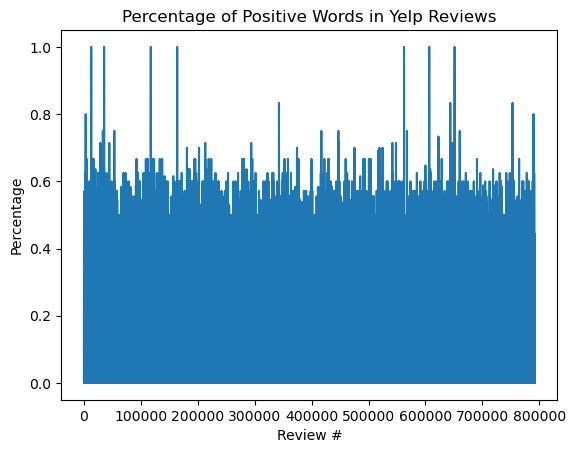

In [59]:
#Positive Word Counts in Review
df_Florida_restaurants_n_reviews['Positive_Words_Precentage'].plot()
plt.title('Percentage of Positive Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

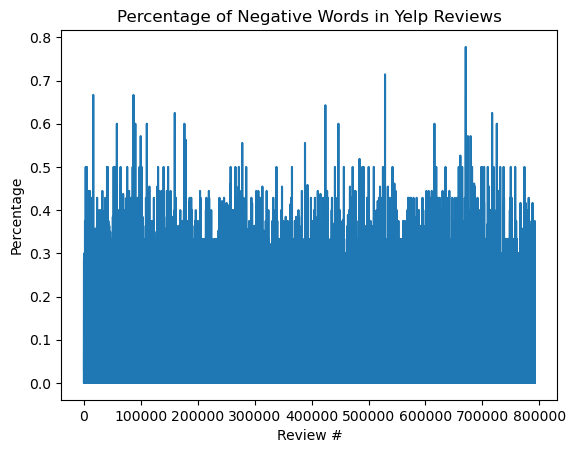

In [60]:
#Negative Word Counts in Review
df_Florida_restaurants_n_reviews['Negative_Words_Precentage'].plot()
plt.title('Percentage of Negative Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Percentage')

Text(0, 0.5, 'Number of Words')

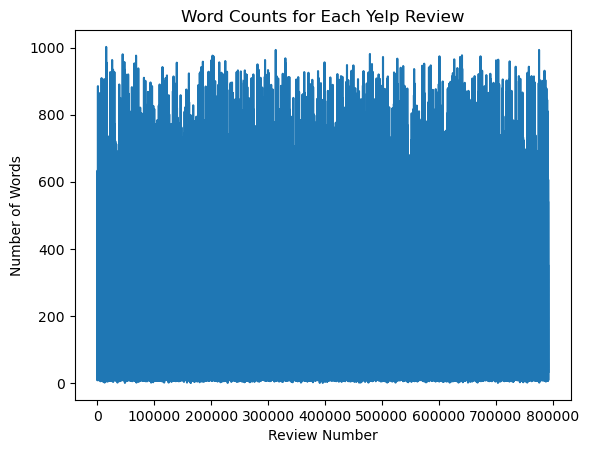

In [61]:
#Review Word Count Plot
df_Florida_restaurants_n_reviews['Review_Word_Count'].plot()
plt.title('Word Counts for Each Yelp Review')
plt.xlabel('Review Number')
plt.ylabel('Number of Words')

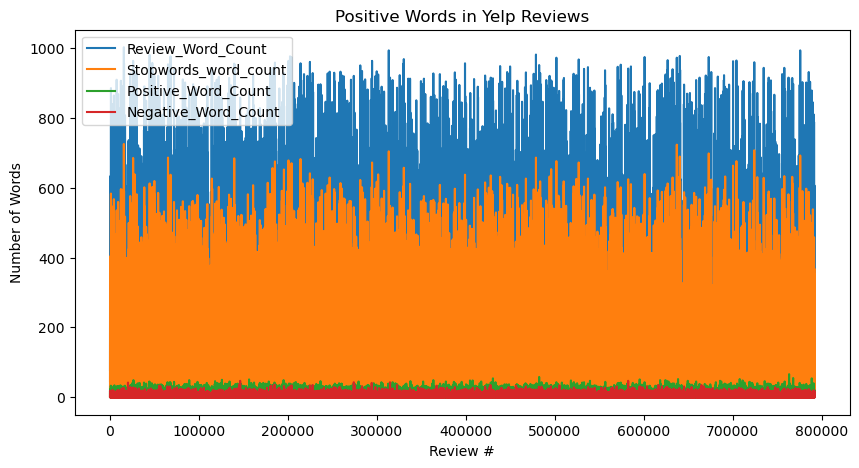

In [62]:
#Number of words in complete review and corresponding positive word count review for each review
plt.figure(figsize=(10,5))
df_Florida_restaurants_n_reviews['Review_Word_Count'].plot()
df_Florida_restaurants_n_reviews['Stopwords_word_count'].plot()
df_Florida_restaurants_n_reviews['Positive_Word_Count'].plot()
df_Florida_restaurants_n_reviews['Negative_Word_Count'].plot()
plt.title('Positive Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Number of Words')
plt.legend()

In [63]:
df_Florida_restaurants_n_reviews_s = df_Florida_restaurants_n_reviews[df_Florida_restaurants_n_reviews['polarity'] != 0]

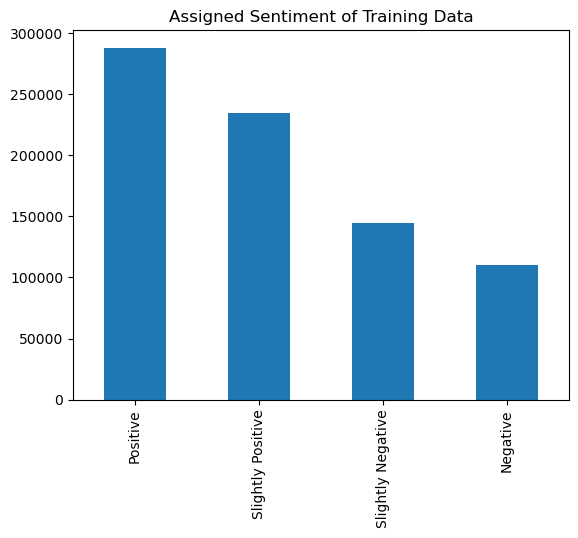

In [64]:
df_Florida_restaurants_n_reviews_s['sentiment'].value_counts().plot(kind='bar')
plt.title('Assigned Sentiment of Training Data');

# Creating feature columns based on sentiment score

In [65]:

# Create new columns for each POS tag
df_Florida_restaurants_n_reviews['num_adj'] = df_Florida_restaurants_n_reviews['pos_tags'].apply(lambda x: len([tup for tup in x if tup[1] == 'JJ']))
df_Florida_restaurants_n_reviews['num_noun'] = df_Florida_restaurants_n_reviews['pos_tags'].apply(lambda x: len([tup for tup in x if tup[1] == 'NN']))
df_Florida_restaurants_n_reviews['num_verb'] = df_Florida_restaurants_n_reviews['pos_tags'].apply(lambda x: len([tup for tup in x if tup[1] == 'VB']))


df_Florida_restaurants_n_reviews.head(2)

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,polarity,subjectivity,sentiment,Positive_Word_Count,Positive_Words_Precentage,Negative_Word_Count,Negative_Words_Precentage,num_adj,num_noun,num_verb
0,0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,...,0.34000,0.630000,Slightly Positive,3,0.093750,1,0.031250,8,18,0
1,1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,...,0.04375,0.477083,Slightly Negative,4,0.117647,2,0.058824,9,16,0


In [66]:
import pandas as pd

# Define weights for each POS tag
pos_weights = {'JJ': 1.5, 'JJR': 1.5, 'JJS': 1.5, 'RB': 1.2, 'RBR': 1.2, 'RBS': 1.2, 'VB': 1.1, 'VBD': 1.1, 'VBG': 1.1,
               'VBN': 1.1, 'VBP': 1.1, 'VBZ': 1.1, 'NN': 0.9, 'NNS': 0.9, 'NNP': 0.9, 'NNPS': 0.9}

# Calculate sentiment score for each row
df_Florida_restaurants_n_reviews['sentiment_score'] = df_Florida_restaurants_n_reviews['pos_tags'].apply(lambda x: sum([pos_weights.get(tup[1], 1.0) for tup in x]))

# Print the DataFrame with the sentiment score
df_Florida_restaurants_n_reviews.head(2)


,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,subjectivity,sentiment,Positive_Word_Count,Positive_Words_Precentage,Negative_Word_Count,Negative_Words_Precentage,num_adj,num_noun,num_verb,sentiment_score
0,0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,...,0.630000,Slightly Positive,3,0.093750,1,0.031250,8,18,0,34.4
1,1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.45632,4.0,...,0.477083,Slightly Negative,4,0.117647,2,0.058824,9,16,0,37.1


In [67]:
df_Florida_restaurants_n_reviews.columns

Index(['index', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'review_id', 'user_id', 'stars_y', 'date', 'text', 'useful',
       'funny', 'cool', 'review', 'text_nopunc', 'Review_Word_Count',
       'pos_tags', 'lemmatized', 'processed_text',
       'No_stopwords_review_word_count', 'Stopwords_word_count',
       'Stopword_Percentage', 'polarity', 'subjectivity', 'sentiment',
       'Positive_Word_Count', 'Positive_Words_Precentage',
       'Negative_Word_Count', 'Negative_Words_Precentage', 'num_adj',
       'num_noun', 'num_verb', 'sentiment_score'],
      dtype='object')

In [68]:
df_Florida_restaurants_n_reviews.to_csv("Florida_restaurants.csv")

In [2]:
df_Florida_restaurants_n_reviews = pd.read_csv('Florida_restaurants.csv')

In [3]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import random

# specify the feature column that you want to stratify on
feature_col = 'sentiment'

# count the number of instances of each class in the feature column
class_counts = df_Florida_restaurants_n_reviews[feature_col].value_counts()

# calculate the minimum number of samples to select from each class
min_class_samples = int(20000 / len(class_counts))

# initialize a dictionary to store the indices of the selected samples
sample_indices = {}

# loop through each class and select the required number of samples
for c in class_counts.index:
    # select indices of all instances of the class
    class_indices = df_Florida_restaurants_n_reviews[df_Florida_restaurants_n_reviews[feature_col] == c].index.tolist()
    
    # shuffle the indices to ensure randomness
    random.shuffle(class_indices)
    
    # select the required number of samples for this class
    sample_indices[c] = class_indices[:min_class_samples]

# concatenate the selected indices from each class into a single list
final_sample_indices = []
for c in class_counts.index:
    final_sample_indices += sample_indices[c]

# select the rows corresponding to the final sample indices
df_Florida_restaurants_n_reviews_sample = df_Florida_restaurants_n_reviews.loc[final_sample_indices]


In [4]:
df_Florida_restaurants_n_reviews_sample = df_Florida_restaurants_n_reviews.sample(20000, random_state=1)

In [4]:
df_Florida_restaurants_n_reviews_sample = df_Florida_restaurants_n_reviews_sample.reset_index()

In [5]:
df_Florida_restaurants_n_reviews_sample = df_Florida_restaurants_n_reviews_sample.dropna()

In [6]:
df_Florida_restaurants_n_reviews_sample

,level_0,Unnamed: 0,index,business_id,name,address,city,state,postal_code,latitude,...,subjectivity,sentiment,Positive_Word_Count,Positive_Words_Precentage,Negative_Word_Count,Negative_Words_Precentage,num_adj,num_noun,num_verb,sentiment_score
0,244775,244775,244775,xmHRpcFzeV3TbnhB7PAlZQ,The Birch & Vine,340 Beach Dr NE,Saint Petersburg,FL,33701.0,27.776026,...,0.975000,Positive,2,0.066667,1,0.033333,4,17,1,31.1
1,371341,371341,371341,8syjAtrpRfBgiH2vcfNsrg,Thai Bay Restaurant,1300 E Bay Dr,Largo,FL,33771.0,27.916908,...,0.760714,Positive,3,0.093750,2,0.062500,11,9,1,37.2
2,648010,648010,648010,6-ixjryKFrCgue3JaHnvXQ,Pearly's Beach Eats,45 Papaya St,Clearwater,FL,33767.0,27.979929,...,0.400000,Positive,2,0.250000,0,0.000000,1,2,0,8.7
3,649474,649474,649474,TSVy1TGUymrtG1uqDXm63A,O'Keefe's Tavern,1219 S Fort Harrison Ave,Clearwater,FL,33756.0,27.952873,...,0.712500,Positive,2,0.142857,0,0.000000,3,2,0,15.6
4,235800,235800,235800,ObHsdZKeFSvoPJT8D0r1yA,The Avenue DTSP,330 1st Ave S,Saint Petersburg,FL,33701.0,27.770057,...,0.633333,Positive,4,0.333333,0,0.000000,3,7,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,626389,626389,626389,dsfRniRgfbDjC8os848B6A,Bern's Steak House,1208 S Howard Ave,Tampa,FL,33606.0,27.931862,...,0.000000,Neutral,0,0.000000,0,0.000000,2,2,0,7.7
19996,677701,677701,677701,gcLHVHLDOozjllD-yiAnlQ,Samaria Cafe,502 N Tampa St,Tampa,FL,33602.0,27.948290,...,0.000000,Neutral,2,0.142857,2,0.142857,1,7,0,14.0
19997,209930,209930,209930,3WC9HidyqFisiDxP1dcFCA,Miguelitos Taqueria Y Tequilas,2702 W Kennedy Blvd,Tampa,FL,33609.0,27.944494,...,0.285714,Neutral,2,0.105263,0,0.000000,6,5,0,21.8
19998,344313,344313,344313,9JrZDH4Mq0BXQ2GYIJmo-g,OLIVIA,3601 W Swann Ave,Tampa,FL,33609.0,27.937773,...,0.100000,Neutral,2,0.133333,0,0.000000,4,11,0,15.9


## Creating a Training dataset

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = df_Florida_restaurants_n_reviews_sample['processed_text']
Tvectorizer = TfidfVectorizer()
Tvectorizer.fit(text)
Tvector = Tvectorizer.transform(text)

In [8]:
voc = Tvectorizer.vocabulary_
df_Florida_restaurants_features_frame = pd.DataFrame(Tvector.toarray(),columns=voc)
#df_Florida_restaurants_features_frame = pd.DataFrame()


col_name1 ='Name'
col_name2 = 'Review'
col_name3 = 'Polarity'
col_name4 = 'Sentiment'
col_name5 = 'Positive_Words_Precentage'
col_name6 = 'Negative_Words_Precentage'
col_name7 = 'Stopword_Precentage'
col_name8 = 'Sentiment_score'
# col_name9 = 'Rating'
# col_name10 = 'num_adj'


col1 = df_Florida_restaurants_n_reviews_sample['name']
col2 = df_Florida_restaurants_n_reviews_sample['review']
col3 = df_Florida_restaurants_n_reviews_sample['polarity']
col4 = df_Florida_restaurants_n_reviews_sample['sentiment']
col5 = df_Florida_restaurants_n_reviews_sample['Positive_Words_Precentage']
col6 = df_Florida_restaurants_n_reviews_sample['Negative_Words_Precentage']
col7 = df_Florida_restaurants_n_reviews_sample['Stopword_Percentage']
col8 = df_Florida_restaurants_n_reviews_sample['sentiment_score']
# col9 = df_Florida_restaurants_n_reviews_sample['stars_x']
# col10 = df_Florida_restaurants_n_reviews_sample['num_adj']




df_Florida_restaurants_features_frame.insert(0,col_name1,col1)
df_Florida_restaurants_features_frame.insert(1,col_name2,col2)
df_Florida_restaurants_features_frame.insert(2,col_name3,col3)
df_Florida_restaurants_features_frame.insert(3,col_name4,col4)
df_Florida_restaurants_features_frame.insert(4,col_name5,col5)
df_Florida_restaurants_features_frame.insert(5,col_name6,col6)
df_Florida_restaurants_features_frame.insert(6,col_name7,col7)
df_Florida_restaurants_features_frame.insert(7,col_name8,col8)
# df_Florida_restaurants_features_frame.insert(8,col_name9,col9)
# df_Florida_restaurants_features_frame.insert(9,col_name10,col10)


# # Define column names
# col_names = ['name', 'review', 'polarity', 'sentiment', 'Positive_Words_Precentage']

# # Extract columns from original DataFrame
# cols = [df_Florida_restaurants[name] for name in col_names]

# # Create new DataFrame with additional columns using assign()
# df_Florida_restaurants_features_frame = (
#     pd.DataFrame(Tvector.toarray(), columns=Tvectorizer.vocabulary_)
#     .assign(name=df_Florida_restaurants['name'],
#             review=df_Florida_restaurants['review'],
#             polarity=df_Florida_restaurants['polarity'],
#             sentiment=df_Florida_restaurants['sentiment'],
#             Positive_Words_Precentage=df_Florida_restaurants['Positive_Words_Precentage'])
# )

In [9]:
df_Florida_restaurants_features_frame

,Name,Review,Polarity,Sentiment,Positive_Words_Precentage,Negative_Words_Precentage,Stopword_Precentage,Sentiment_score,notch,service,...,pouca,lastimável,otima,karol,partyon,reccomended,pesaj,succulence,credence,remold
0,The Birch & Vine,Top notch service by our wonderful waitress Al...,0.650000,Positive,0.066667,0.033333,0.642857,31.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Thai Bay Restaurant,This place is very unassuming from the outside...,0.464286,Positive,0.093750,0.062500,0.604938,37.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pearly's Beach Eats,I enjoyed this restaurant. The food was good a...,0.400000,Positive,0.250000,0.000000,0.578947,8.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,O'Keefe's Tavern,Absolutely loved the atmosphere and food. Even...,0.668750,Positive,0.142857,0.000000,0.440000,15.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Avenue DTSP,"The service is great, the manager is always fr...",0.508333,Positive,0.333333,0.000000,0.538462,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19934,Taco Bell,I've literally been in line for 14 mins and we...,0.000000,Neutral,0.000000,0.000000,0.421053,11.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19935,Lenny's Restaurant,The Best breakfast!! You will never regret sta...,0.000000,Neutral,0.083333,0.083333,0.500000,13.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19936,Falabella Family Bistro,"Ordered take out, the bruschetta was soggy - w...",0.000000,Neutral,0.125000,0.000000,0.733333,8.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19937,Shawarma Elshami,This place has one of the best or even the bes...,0.000000,Neutral,0.062500,0.000000,0.680000,17.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_Florida_restaurants_features_frame = df_Florida_restaurants_features_frame.dropna()

In [11]:
df_Florida_restaurants_features_frame = df_Florida_restaurants_features_frame[df_Florida_restaurants_features_frame['Sentiment'] != 'Neutral']

Accuracy Score:  0.6255639097744361

Overall Statistics : 

ACC Macro                                                         0.81278
F1 Macro                                                          0.62157
FPR Macro                                                         0.12499
Kappa                                                             0.50096
Overall ACC                                                       0.62556
PPV Macro                                                         0.61954
SOA1(Landis & Koch)                                               Moderate
TPR Macro                                                         0.62912
Zero-one Loss                                                     1494

Class Statistics :

Classes                                                           Negative              Positive              Slightly Negative     Slightly Positive     
ACC(Accuracy)                                                     0.85915               0.85664     

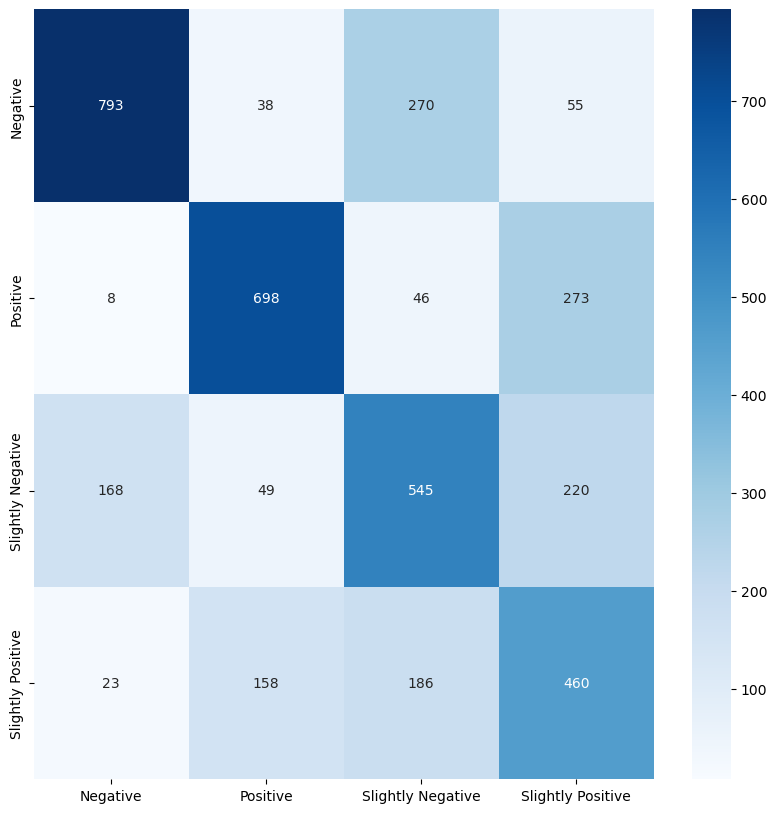

In [14]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from pycm import *
import matplotlib.pyplot as plt


X = df_Florida_restaurants_features_frame.iloc[0:,4:]
y = df_Florida_restaurants_features_frame['Sentiment']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0,test_size=0.25)

clf2 = LogisticRegression(solver = 'lbfgs')
model = Pipeline([('classifier',clf2)])
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)
mat = confusion_matrix(predictions,ytest)
cm_df =  pd.DataFrame(mat, index= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']],
                     columns= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']])
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')

cm = ConfusionMatrix(actual_vector=list(ytest), predict_vector=list(predictions))
print('Accuracy Score: ',accuracy_score(predictions,ytest))
print('')
cm.stat(summary=True)

# Creating training and testing dataset

In [15]:
X = df_Florida_restaurants_features_frame.iloc[0:,4:]
y = df_Florida_restaurants_features_frame['Sentiment']
indices = df_Florida_restaurants_features_frame.index

X_train, X_test, y_train, y_test, itrain, itest = train_test_split(X,y,indices,train_size=0.8,random_state=8)

# Logistic Regression


In [21]:
steps = [('scaler', StandardScaler()), ('lr', LogisticRegression(solver = 'lbfgs'))] 
pipeline = Pipeline(steps)
parameters = {'lr__C':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)
clf.best_params_

{'lr__C': 0.01}

In [22]:
results = clf.predict(X_test)

In [23]:
test_accuracy = clf.score(X_test, y_test)
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.5479323308270677
F1 Score (macro):  0.5476439807417037
F1 Score (micro):  0.5479323308270677
F1 Score (weighted):  0.5479892234878629


In [24]:
lr_acc = test_accuracy
lr_f1 = f1_accuracy
lr_f1m = f1_accuracym
lr_f1w = f1_accuracyw

# Random Forest


In [16]:
from sklearn.ensemble import RandomForestClassifier


In [17]:
steps = [('scaler', StandardScaler()), ('rf', RandomForestClassifier())] 
pipeline = Pipeline(steps) 
parameters = {'rf__n_estimators':[10 , 20, 30, 40, 50], 'rf__max_features':['auto','sqrt']}
clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'rf__max_features': 'sqrt', 'rf__n_estimators': 50}

In [18]:
results = clf.predict(X_test)

In [19]:
test_accuracy = clf.score(X_test, y_test)
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.6102756892230576
F1 Score (macro):  0.5870665502604491
F1 Score (micro):  0.6102756892230576
F1 Score (weighted):  0.5874322035489986


In [20]:
rf_acc = test_accuracy
rf_f1 = f1_accuracy
rf_f1m = f1_accuracym
rf_f1w = f1_accuracyw

# Gradient Boosted Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

steps = [('scaler', StandardScaler()), ('gbc', GradientBoostingClassifier(max_features='sqrt'))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__n_estimators':[10, 50, 100, 200, 500], 'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'gbc__learning_rate': 0.2, 'gbc__n_estimators': 500}

In [26]:
steps = [('scaler', StandardScaler()), ('gbc', GradientBoostingClassifier(learning_rate = 0.15, max_features = 'sqrt', n_estimators = 500))] 
clf = Pipeline(steps) 
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.15,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [27]:
results = clf.predict(X_test)

In [28]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.6782581453634086
F1 Score (macro):  0.6715606653477058
F1 Score (micro):  0.6782581453634086
F1 Score (weighted):  0.6721180750111119


In [29]:
gbc_acc = test_accuracy
gbc_f1 = f1_accuracy
gbc_f1m = f1_accuracym
gbc_f1w = f1_accuracyw

# Support Vector Classification (SVC)

In [31]:
%%time
from sklearn.svm import SVC

steps = [('scaler', StandardScaler()), ('svc', SVC(probability=False,kernel='linear',gamma='auto'))] 
pipeline = Pipeline(steps) 
parameters = {'svc__C':[0.01, 0.1, 1]}

clf = GridSearchCV(pipeline, parameters, cv = 3, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

Wall time: 10h 4min 1s


{'svc__C': 0.1}

In [32]:
results = clf.predict(X_test)

In [33]:
test_accuracy = clf.score(X_test, y_test)
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.5720551378446115
F1 Score (macro):  0.5696173354046554
F1 Score (micro):  0.5720551378446115
F1 Score (weighted):  0.5699596937926091


In [34]:
svc_acc = test_accuracy
svc_f1 = f1_accuracy
svc_f1m = f1_accuracym
svc_f1w = f1_accuracyw

# Results

In [35]:
result1 = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest', 'SVC', 'GBC'],
             'Accuracy':[lr_acc, rf_acc, svc_acc, gbc_acc],
             'F1_Macro':[lr_f1, rf_f1, svc_f1, gbc_f1],
             'F1_Micro':[lr_f1m, rf_f1m, svc_f1m, gbc_f1m],
             'F1_Weighted':[lr_f1w, rf_f1w, svc_f1w, gbc_f1w]})
result1 = result1.round(3)
result1

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,Logistic Regression,0.548,0.548,0.548,0.548
1,Random Forest,0.610,0.587,0.610,0.587
2,SVC,0.572,0.570,0.572,0.570
3,GBC,0.678,0.672,0.678,0.672


# Machine Learning Models with Bag of Words

In [37]:
df_Florida_restaurants_n_reviews_sample['processed_text']

0        notch service wonderful waitress ally cocktail...
1        place unassuming inside decorate traditional d...
2        enjoy restaurant food good portion ample serve...
3        absolutely love atmosphere food kid friendly s...
4        service great manager friendly accommodate pla...
                               ...                        
19995    notch steakhouse comparable steakhouse ive nyc...
19996    disappoint hand plastic cup lipstick mark wait...
19997    simple nacho include 4 chip soggy order chip q...
19998    restaurant notch food wine selection service b...
19999        service food food lack flavor coffee need 6am
Name: processed_text, Length: 19939, dtype: object

In [38]:
X = df_Florida_restaurants_n_reviews_sample['processed_text']
y = df_Florida_restaurants_n_reviews_sample['sentiment']
indices = df_Florida_restaurants_n_reviews_sample.index

In [39]:
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, train_size = 0.8, random_state = 7)

# Naive Bayes with TFIDF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), ('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100], 'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 0.01, 'vec__min_df': 0.01}

In [41]:
results = clf.predict(X_test)

In [42]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.604062186559679
F1 Score (macro):  0.6083930405188515
F1 Score (micro):  0.604062186559679
F1 Score (weighted):  0.6070506541862691


In [43]:
nb_tf_acc = test_accuracy
nb_tf_f1 = f1_accuracy
nb_tf_f1m = f1_accuracym
nb_tf_f1w = f1_accuracyw

# Gradient Boosted Classifier with TFIDF

In [44]:
steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(max_features='sqrt',n_estimators=500))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

clf = GridSearchCV(pipeline, parameters, cv = 3, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'gbc__learning_rate': 0.2}

In [45]:
steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(learning_rate = 0.25, max_features = 'sqrt', n_estimators = 500))] 
clf = Pipeline(steps) 
clf.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.25,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [46]:
results = clf.predict(X_test)

In [47]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.6115847542627884
F1 Score (macro):  0.5972697533506804
F1 Score (micro):  0.6115847542627884
F1 Score (weighted):  0.5955546170992685


In [48]:
gbc_tf_acc = test_accuracy
gbc_tf_f1 = f1_accuracy
gbc_tf_f1m = f1_accuracym
gbc_tf_f1w = f1_accuracyw

In [49]:
result2 = pd.DataFrame({'Model':['NB_TF','GBC_TF'],
             'Accuracy':[nb_tf_acc, gbc_tf_acc],
             'F1_Macro':[nb_tf_f1, gbc_tf_f1],
             'F1_Micro':[nb_tf_f1m, gbc_tf_f1m],
             'F1_Weighted':[nb_tf_f1w,gbc_tf_f1w]})
result2 = result2.round(3)
result2

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,NB_TF,0.604,0.608,0.604,0.607
1,GBC_TF,0.612,0.597,0.612,0.596
